# Credit Risk Loan ID/X Virtual Intern

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from operator import itemgetter
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, roc_auc_score
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')

Load Dataset

In [2]:
%matplotlib inline
loan_data = pd.read_csv("loan_data_2007_2014.csv")

In [3]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
loan_data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Fix Format

Convert string to dateformat

In [7]:
#Change string to dateformat

fixdate = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','next_pymnt_d']
for col in fixdate:
    loan_data[col] = pd.to_datetime(loan_data[col], format='%b-%y')
    loan_data[col] = loan_data[col].dt.strftime('%Y-%m')
    loan_data[col] = pd.to_datetime(loan_data[col], format='%Y-%m')

Convert term month to numerical data

In [8]:
loan_data['term_month'] = loan_data.term.str.rsplit(' ').str[1]
loan_data['term_month'] = loan_data['term_month'].astype(int)
loan_data.drop('term', axis=1, inplace=True)

Convert emp_length to numerical data

In [9]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '')
loan_data['emp_length'] = loan_data['emp_length'].astype(float)

##### Drop Column useless

In [10]:
cols_to_drop = [
    # Similiar
    'Unnamed: 0',
    'member_id',
    'funded_amnt_inv',
    # Text 
    'url',
    'desc',
    
    # undefined
    'zip_code',
    'sub_grade'
]

In [11]:
loan_data.drop(cols_to_drop, axis=1, inplace=True)

#### Handling missing value

In [12]:
loan_data.shape

(466285, 68)

In [13]:
# if null value in coloumn more than 60%
print(466285*50/100)

233142.5


In [14]:
for col in loan_data:
    if loan_data[col].isnull().sum()>233143:
        print(col)
        loan_data.drop(col, axis=1, inplace=True)

mths_since_last_delinq
mths_since_last_record
mths_since_last_major_derog
annual_inc_joint
dti_joint
verification_status_joint
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
inq_fi
total_cu_tl
inq_last_12m


In [15]:
loan_data.shape

(466285, 48)

fix date format next_pymnt_d

In [16]:
loan_data['next_pymnt_d'] = pd.to_datetime(loan_data['last_pymnt_d']) + pd.DateOffset(months=1)
loan_data['next_pymnt_d'] = loan_data['next_pymnt_d'].dt.strftime('%Y-%m')
loan_data['next_pymnt_d'] = pd.to_datetime(loan_data['next_pymnt_d'], format='%Y-%m')

In [17]:
loan_data.head()

,id,loan_amnt,funded_amnt,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_month
0,1077501,5000,5000,10.65,162.87,B,NaN,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2015-02-01,2016-01-01,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,36
1,1077430,2500,2500,15.27,59.83,C,Ryder,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-05-01,2013-09-01,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,60
2,1077175,2400,2400,15.96,84.33,C,NaN,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2014-07-01,2016-01-01,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,36
3,1076863,10000,10000,13.49,339.31,C,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-02-01,2015-01-01,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,36
4,1075358,3000,3000,12.69,67.79,B,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,Personal,OR,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,60


# Handling missing value

In [18]:
loan_data.isnull().sum()

id                                0
loan_amnt                         0
funded_amnt                       0
int_rate                          0
installment                       0
grade                             0
emp_title                     27588
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                            20
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
out_prncp                   

In [19]:
# split data by tipe (categorical an numerical)
cat = loan_data.select_dtypes('object')
num = loan_data.select_dtypes('number')

In [20]:
# splitting data kategori dan numerikal (untuk melakukan plot)
kategori = []
numerikal = []
for i in cat.columns:
    kategori.append(i)
for i in num.columns:
    numerikal.append(i)

### Handling missing value kategori data

In [21]:
loan_data[kategori].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                466285 non-null  object
 1   emp_title            438697 non-null  object
 2   home_ownership       466285 non-null  object
 3   verification_status  466285 non-null  object
 4   loan_status          466285 non-null  object
 5   pymnt_plan           466285 non-null  object
 6   purpose              466285 non-null  object
 7   title                466265 non-null  object
 8   addr_state           466285 non-null  object
 9   initial_list_status  466285 non-null  object
 10  application_type     466285 non-null  object
dtypes: object(11)
memory usage: 39.1+ MB


In [22]:
loan_data[kategori].isnull().sum()

grade                      0
emp_title              27588
home_ownership             0
verification_status        0
loan_status                0
pymnt_plan                 0
purpose                    0
title                     20
addr_state                 0
initial_list_status        0
application_type           0
dtype: int64

In [23]:
# cek jika kategori data memilik nilai uniq terlalu banyak maka di drop
loan_data[kategori].nunique()

# emp_title terlalu banyak yang uniq maka bisa di drop
# apllication type hanya 1 nilai uniq maka drop
# title terlalu banyak nilai uniq maka drop

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
loan_status                 9
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [24]:
# drop kolom 
cols_cat_to_drop = [
    'emp_title',
    'application_type',
    'title'
]

In [25]:
loan_data.drop(cols_cat_to_drop, axis=1, inplace=True)

In [26]:
cat = loan_data.select_dtypes('object')
kategori = []
for i in cat.columns:
    kategori.append(i)

In [27]:
loan_data[kategori].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                466285 non-null  object
 1   home_ownership       466285 non-null  object
 2   verification_status  466285 non-null  object
 3   loan_status          466285 non-null  object
 4   pymnt_plan           466285 non-null  object
 5   purpose              466285 non-null  object
 6   addr_state           466285 non-null  object
 7   initial_list_status  466285 non-null  object
dtypes: object(8)
memory usage: 28.5+ MB


#### handling missing value numerikal data

In [28]:
loan_data[numerikal].isnull().sum()

id                                0
loan_amnt                         0
funded_amnt                       0
int_rate                          0
installment                       0
emp_length                    21008
annual_inc                        4
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med      145
policy_code                       0
acc_now_delinq              

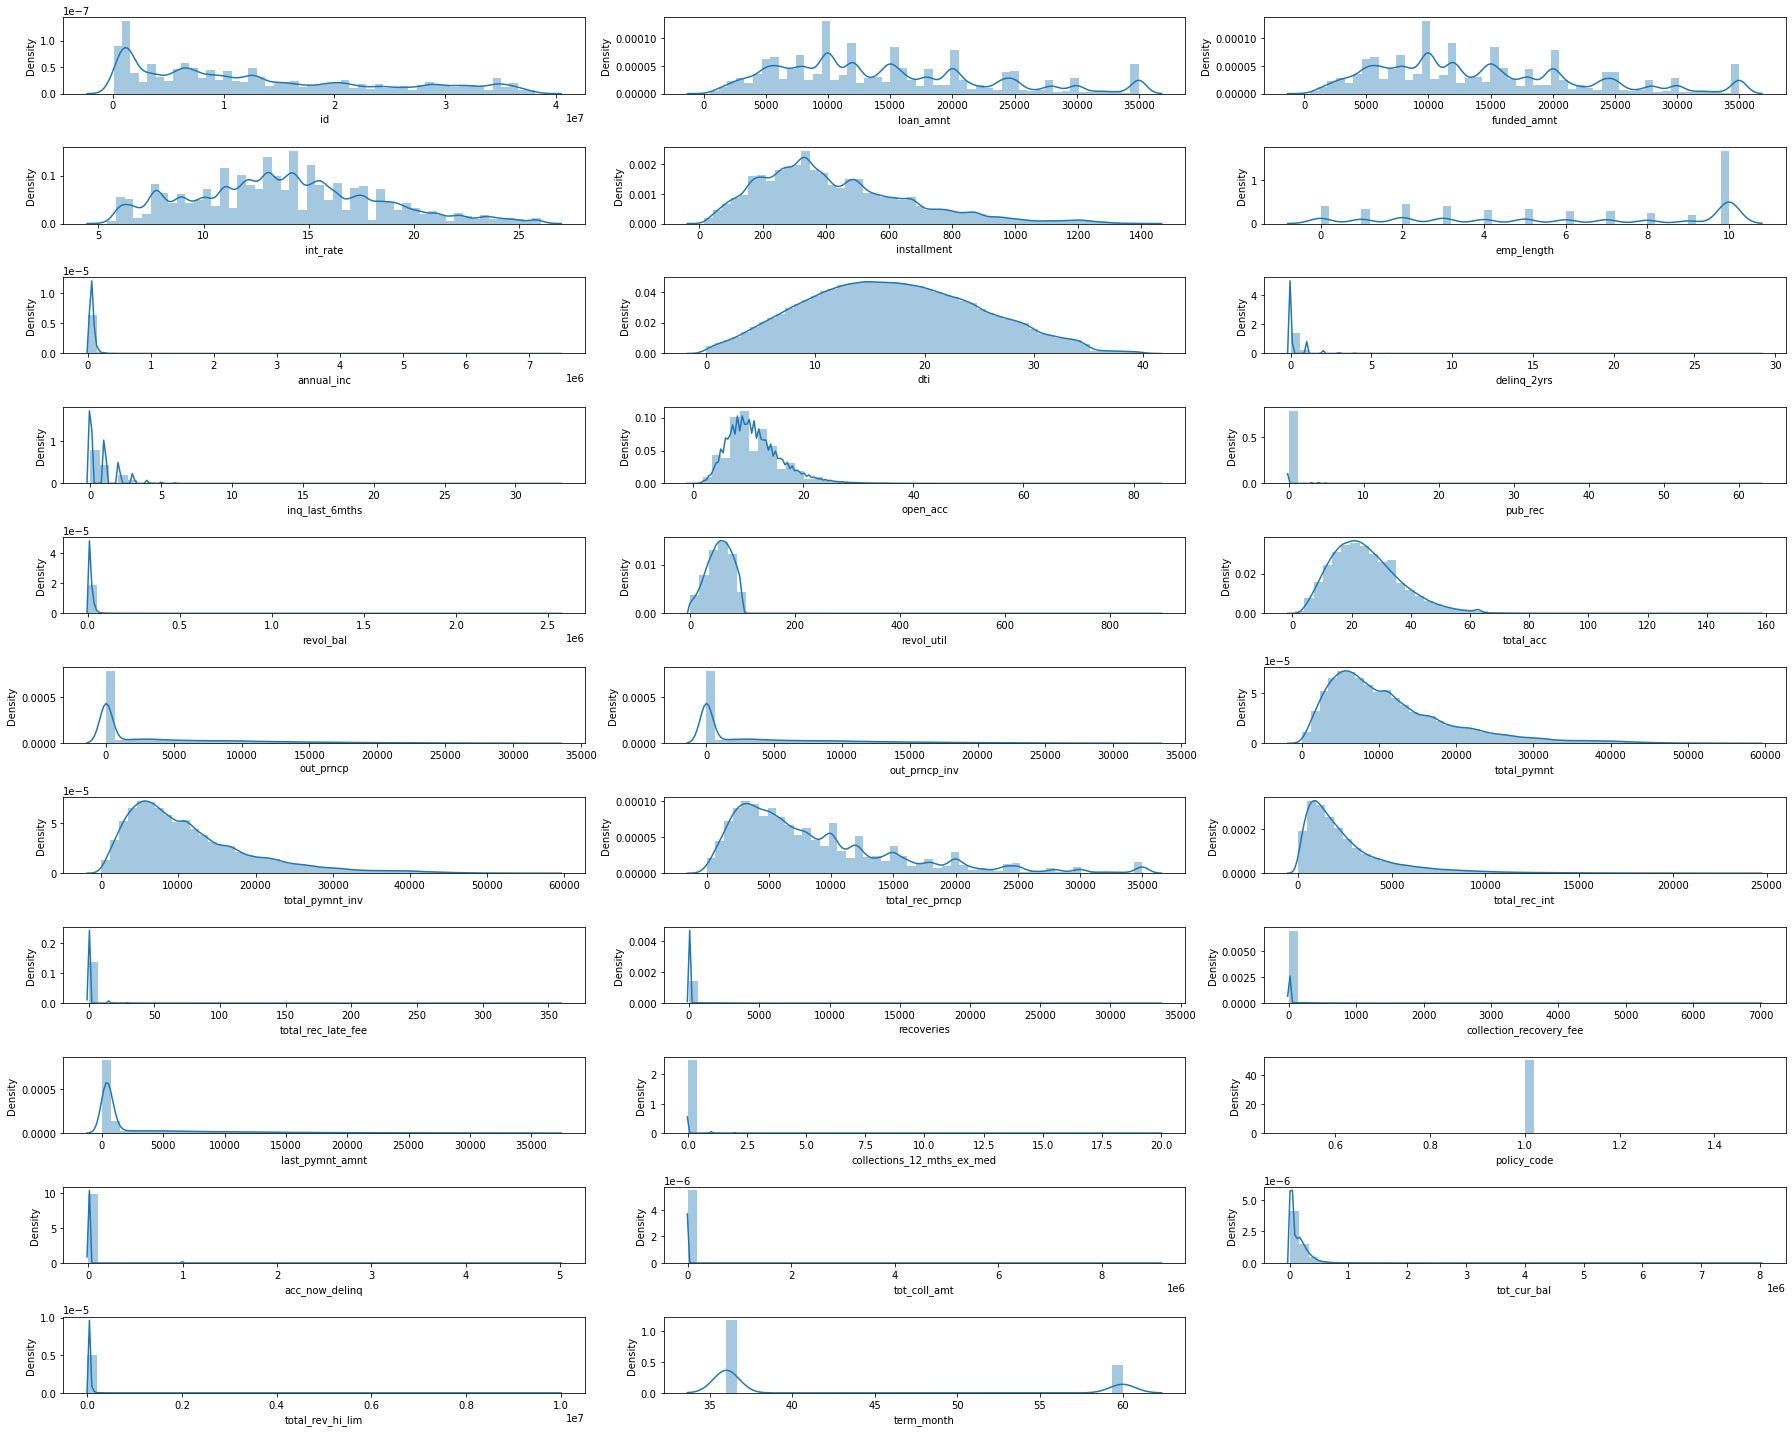

In [29]:
plt.figure(figsize=(25,20))
for i in range(len(numerikal)):
    plt.subplot(11,3,i+1)
    sns.distplot(loan_data[numerikal[i]], kde=True)
    plt.tight_layout()
plt.show()

## Handling missing value with skew

In [30]:
for col in numerikal:
    skewvalue = loan_data[col].skew(axis=0, skipna=True)
    if skewvalue <=0.5 and skewvalue >=-0.5:
        loan_data[col].fillna(value=loan_data[col].mean(), inplace=True)
    else:
        loan_data[col].fillna(value=loan_data[col].median(), inplace=True)

In [31]:
loan_data.isnull().sum()

id                              0
loan_amnt                       0
funded_amnt                     0
int_rate                        0
installment                     0
grade                           0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line               29
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      0
total_acc                       0
initial_list_status             0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_inv                 0
total_rec_prnc

In [32]:
loan_data.head()

,id,loan_amnt,funded_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_month
0,1077501,5000,5000,10.65,162.87,B,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2015-02-01,2016-01-01,0.0,1,0.0,0.0,81539.0,22800.0,36
1,1077430,2500,2500,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-05-01,2013-09-01,0.0,1,0.0,0.0,81539.0,22800.0,60
2,1077175,2400,2400,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2014-07-01,2016-01-01,0.0,1,0.0,0.0,81539.0,22800.0,36
3,1076863,10000,10000,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-02-01,2015-01-01,0.0,1,0.0,0.0,81539.0,22800.0,36
4,1075358,3000,3000,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,1,0.0,0.0,81539.0,22800.0,60


# handling missing value date (remove row)

In [33]:
loan_data.dropna(inplace=True)

In [34]:
loan_data.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

In [35]:
# Handling missing value and fix format done

# Re-check data

In [36]:
loan_data_1 = loan_data.copy()

In [37]:
loan_data_1.min() 
#tidak ada nilai aneh

id                                          54734
loan_amnt                                     500
funded_amnt                                   500
int_rate                                     5.42
installment                                 15.67
grade                                           A
emp_length                                    0.0
home_ownership                                ANY
annual_inc                                 1896.0
verification_status                  Not Verified
issue_d                       2007-06-01 00:00:00
loan_status                           Charged Off
pymnt_plan                                      n
purpose                                       car
addr_state                                     AK
dti                                           0.0
delinq_2yrs                                   0.0
earliest_cr_line              1969-01-01 00:00:00
inq_last_6mths                                0.0
open_acc                                      0.0


In [38]:
loan_data_1.max() 
#teradapat nilai aneh vairabel earliest_cr_line memiliki tahun lebih dari 2060 padahal ini adalah data loan 2007-2014 dan earliest credit line adalah pertama kali user melakukan kredit

id                                       38098114
loan_amnt                                   35000
funded_amnt                                 35000
int_rate                                    26.06
installment                               1409.99
grade                                           G
emp_length                                   10.0
home_ownership                               RENT
annual_inc                              7500000.0
verification_status                      Verified
issue_d                       2014-12-01 00:00:00
loan_status                    Late (31-120 days)
pymnt_plan                                      y
purpose                                   wedding
addr_state                                     WY
dti                                         39.99
delinq_2yrs                                  29.0
earliest_cr_line              2068-12-01 00:00:00
inq_last_6mths                               33.0
open_acc                                     84.0


In [39]:
loan_data_1[loan_data_1['earliest_cr_line']>'2060-12'] 
# karena data aneh(bisa saja salah input) maka saya drop colom ini

,id,loan_amnt,funded_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_month
1580,1048395,21000,21000,7.51,653.33,A,5.99333,MORTGAGE,49200.0,Verified,2011-12-01,Fully Paid,n,credit_card,MT,27.02,0.0,2062-09-01,1.0,8.0,0.0,14491,19.7,15.0,f,0.00,0.00,23043.77000,22906.61,21000.00,2043.77,0.000000,0.0,0.0,2013-09-01,10000.95,2013-10-01,2013-09-01,0.0,1,0.0,0.0,81539.0,22800.0,36
1770,1042802,5500,5500,7.51,171.11,A,4.00000,RENT,63000.0,Verified,2011-12-01,Fully Paid,n,other,CA,5.56,2.0,2068-09-01,0.0,6.0,0.0,6981,20.1,15.0,f,0.00,0.00,5538.32000,5538.32,5500.00,38.32,0.000000,0.0,0.0,2012-02-01,539.21,2012-03-01,2015-09-01,0.0,1,0.0,0.0,81539.0,22800.0,36
2799,1031659,5200,5200,8.90,107.70,A,5.99333,RENT,36000.0,Source Verified,2011-11-01,Late (16-30 days),n,vacation,NY,8.17,0.0,2064-09-01,0.0,6.0,0.0,465,2.2,25.0,f,1254.13,1254.13,5177.93000,5177.93,3945.87,1202.09,29.962286,0.0,0.0,2015-12-01,107.70,2016-01-01,2016-01-01,0.0,1,0.0,0.0,81539.0,22800.0,60
3282,1021976,5000,5000,12.69,167.73,B,10.00000,MORTGAGE,72000.0,Source Verified,2011-11-01,Fully Paid,n,vacation,PA,7.75,0.0,2067-09-01,1.0,5.0,0.0,4477,32.2,25.0,f,0.00,0.00,6034.82655,6034.83,5000.00,1034.83,0.000000,0.0,0.0,2014-12-01,187.76,2015-01-01,2015-05-01,0.0,1,0.0,0.0,81539.0,22800.0,36
3359,1013619,21000,21000,12.69,704.45,B,10.00000,MORTGAGE,267000.0,Source Verified,2011-11-01,Fully Paid,n,small_business,CO,8.87,0.0,2065-02-01,2.0,10.0,0.0,51942,36.8,27.0,f,0.00,0.00,25354.04165,25354.04,21000.00,4354.04,0.000000,0.0,0.0,2014-12-01,725.56,2015-01-01,2014-11-01,0.0,1,0.0,0.0,81539.0,22800.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463887,10101103,12700,12700,21.48,481.61,E,5.99333,OWN,36000.0,Verified,2014-01-01,Current,n,small_business,TX,30.17,0.0,2064-05-01,0.0,7.0,0.0,20039,49.7,15.0,w,5159.46,5159.46,11558.64000,11558.64,7540.54,4018.10,0.000000,0.0,0.0,2016-01-01,481.61,2016-02-01,2016-01-01,0.0,1,0.0,0.0,31401.0,40300.0,36
464003,10080767,3650,3650,16.24,128.76,C,5.99333,MORTGAGE,46000.0,Verified,2014-01-01,Current,n,credit_card,NC,9.91,0.0,2068-01-01,2.0,8.0,0.0,13852,66.0,23.0,f,1417.30,1417.30,3090.10000,3090.10,2232.70,857.40,0.000000,0.0,0.0,2016-01-01,128.76,2016-02-01,2016-01-01,0.0,1,0.0,150.0,13852.0,21000.0,36
464260,10106909,22500,22500,6.62,690.84,A,4.00000,RENT,50000.0,Verified,2014-01-01,Fully Paid,n,debt_consolidation,NY,25.66,0.0,2066-07-01,1.0,16.0,0.0,27776,30.2,30.0,f,0.00,0.00,23502.82531,23502.83,22500.00,1002.83,0.000000,0.0,0.0,2014-10-01,17977.71,2014-11-01,2015-12-01,0.0,1,0.0,0.0,69218.0,91900.0,36
465100,10109870,14000,14000,9.67,449.58,B,7.00000,MORTGAGE,80100.0,Not Verified,2014-01-01,Current,n,credit_card,KS,11.69,1.0,2067-10-01,0.0,22.0,0.0,9209,30.4,48.0,f,5122.93,5068.04,10789.33000,10673.73,8877.07,1912.26,0.000000,0.0,0.0,2016-01-01,449.58,2016-02-01,2016-01-01,0.0,1,0.0,0.0,114817.0,30300.0,36


In [40]:
loan_data_1.drop('earliest_cr_line', axis=1, inplace=True)

In [41]:
loan_data_1.nunique()
# terdapat data numerikal yang memiliki nilai uniq hanya 1 maka drop

id                            465839
loan_amnt                       1352
funded_amnt                     1354
int_rate                         506
installment                    55588
grade                              7
emp_length                        12
home_ownership                     6
annual_inc                     31884
verification_status                3
issue_d                           91
loan_status                        9
pymnt_plan                         2
purpose                           14
addr_state                        50
dti                             3997
delinq_2yrs                       24
inq_last_6mths                    28
open_acc                          62
pub_rec                           26
revol_bal                      58131
revol_util                      1270
total_acc                        112
initial_list_status                2
out_prncp                     135657
out_prncp_inv                 141181
total_pymnt                   351289
t

In [42]:
loan_data_1.drop('policy_code', axis=1, inplace=True)

In [43]:
loan_data_1.describe()

,id,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_month
count,4.658390e+05,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,4.658390e+05,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,4.658390e+05,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,465839.000000,4.658390e+05,4.658390e+05,4.658390e+05,465839.000000
mean,1.308226e+07,14320.476602,14294.980240,13.827671,432.142731,5.994277,7.328680e+04,17.220698,0.284637,0.804329,11.188557,0.160583,1.623505e+04,56.180506,25.067764,4413.903168,4412.291543,11549.816666,11479.193154,8873.610716,2590.972330,0.650351,84.583272,8.894987,3126.644747,0.009080,0.004004,1.629636e+02,1.302045e+05,2.924132e+04,42.606712
std,1.089314e+07,8285.668357,8273.522954,4.356946,243.454642,3.544275,5.497357e+04,7.850309,0.797276,1.091259,4.987134,0.510940,2.067824e+04,23.722251,11.599063,6356.543844,6354.662683,8263.516980,8251.880469,7030.126025,2483.803614,5.265002,549.774911,85.079210,5556.464550,0.108615,0.068652,1.348909e+04,1.417001e+05,3.444218e+04,10.719734
min,5.473400e+04,500.000000,500.000000,5.420000,15.670000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,33.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,36.000000
25%,3.640708e+06,8000.000000,8000.000000,10.990000,256.820000,3.000000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,0.000000,6.417000e+03,39.250000,17.000000,0.000000,0.000000,5561.985000,5506.720000,3717.990000,959.250000,0.000000,0.000000,0.000000,312.910000,0.000000,0.000000,0.000000e+00,3.362000e+04,1.500000e+04,36.000000
50%,1.010864e+07,12000.000000,12000.000000,13.660000,380.110000,6.000000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,1.176900e+04,57.500000,23.000000,466.580000,466.350000,9426.240000,9362.100000,6825.000000,1820.460000,0.000000,0.000000,0.000000,546.470000,0.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04,36.000000
75%,2.073145e+07,20000.000000,20000.000000,16.490000,566.660000,10.000000,8.900000e+04,22.780000,0.000000,1.000000,14.000000,0.000000,2.033900e+04,74.700000,32.000000,7352.140000,7347.405000,15315.640000,15238.340000,12000.000000,3306.210000,0.000000,0.000000,0.000000,3196.495000,0.000000,0.000000,0.000000e+00,1.849975e+05,3.430000e+04,60.000000
max,3.809811e+07,35000.000000,35000.000000,26.060000,1409.990000,10.000000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,60.000000


# Handling outlier

In [44]:
num = loan_data_1.select_dtypes('number')
numerikal = []
for i in num.columns:
    numerikal.append(i)

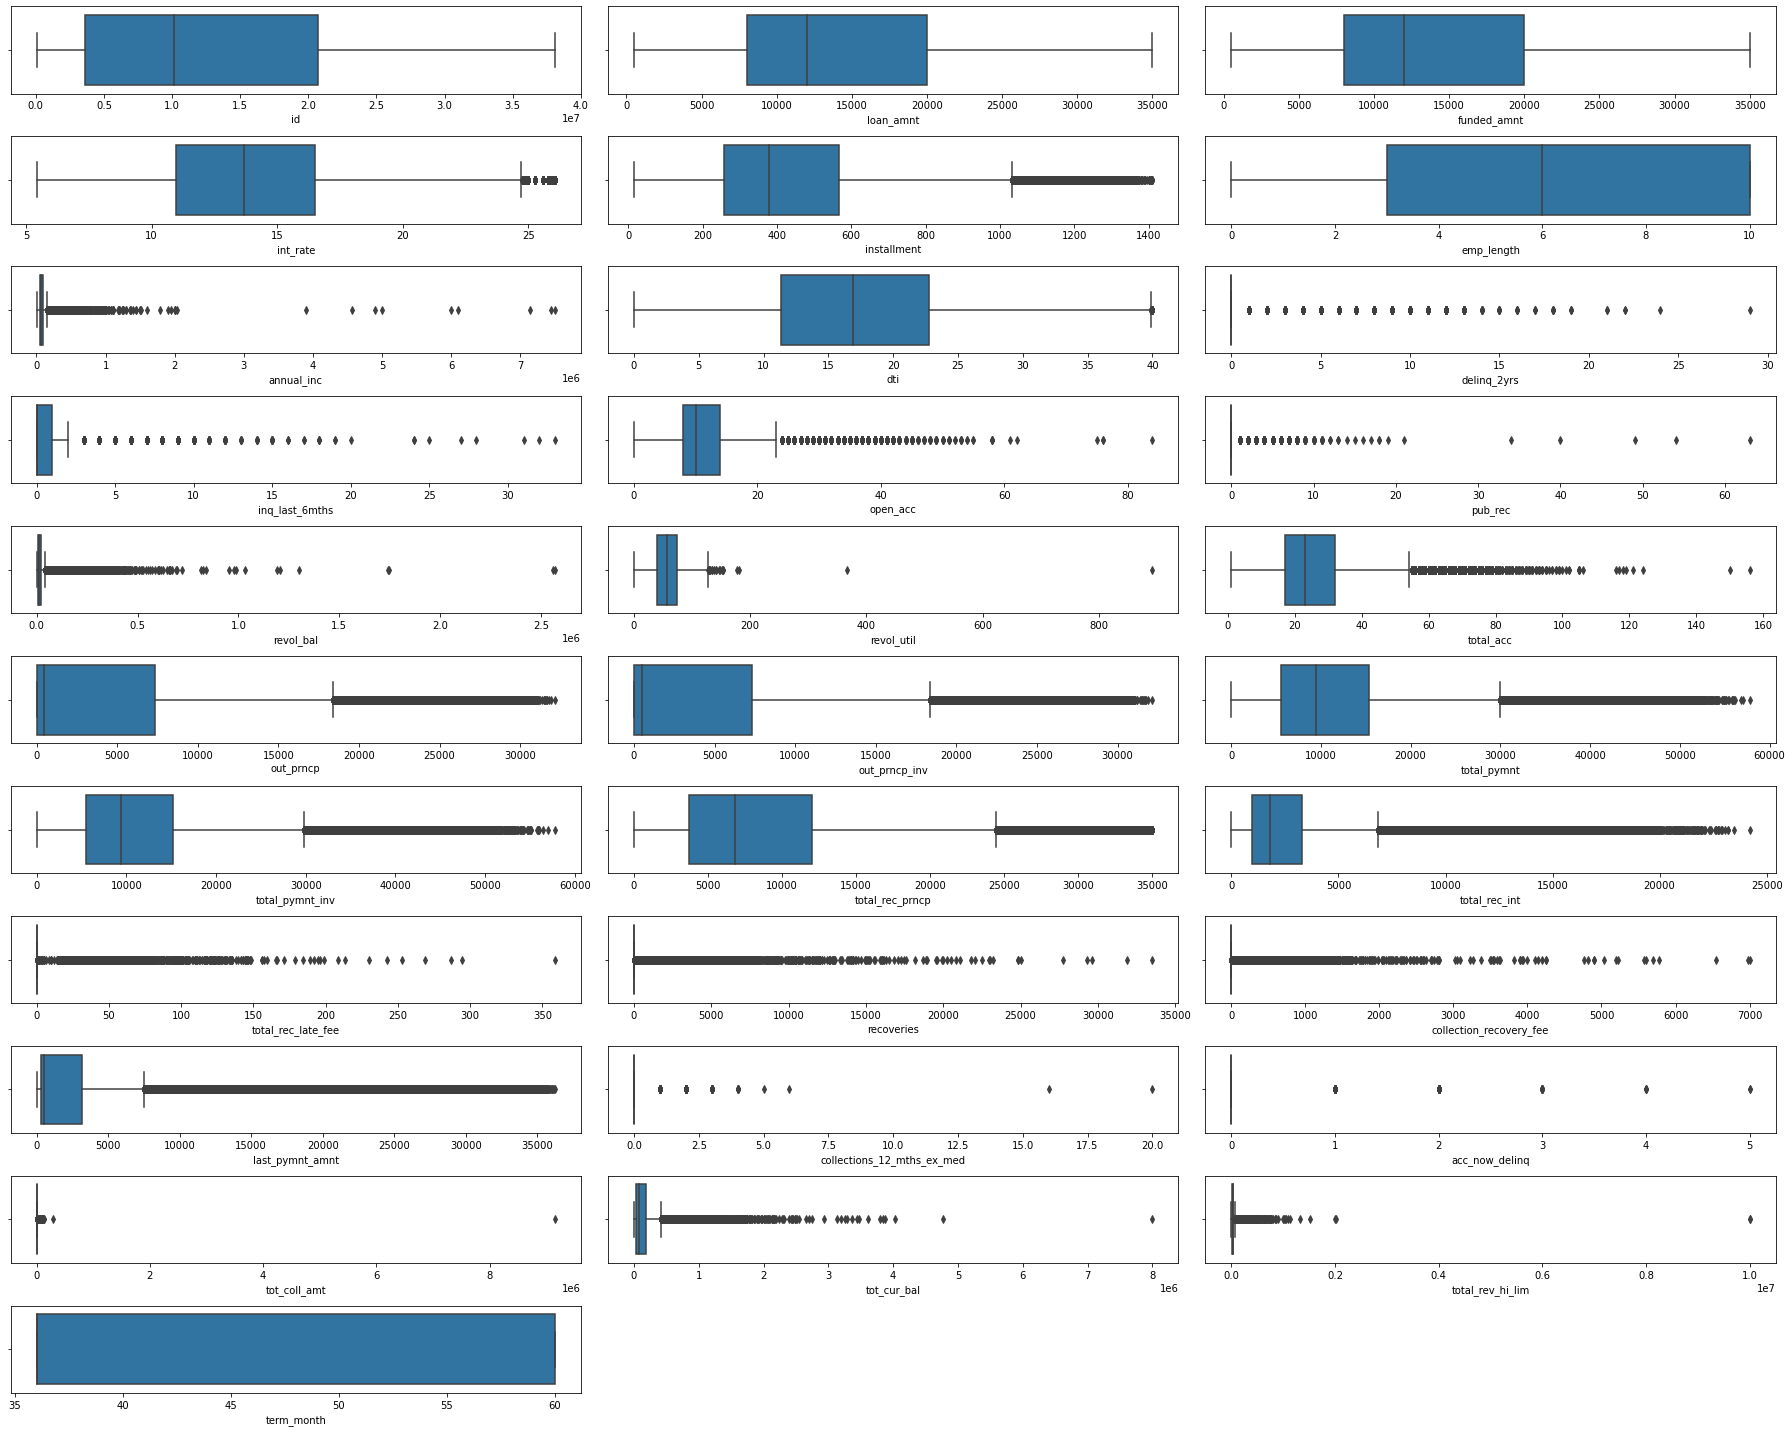

In [45]:
plt.figure(figsize=(25,20))
for i in range(len(numerikal)):
    plt.subplot(11,3,i+1)
    sns.boxplot(loan_data_1[numerikal[i]])
    plt.tight_layout()
plt.show()

In [46]:
loan_data_1[numerikal].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465839 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          465839 non-null  int64  
 1   loan_amnt                   465839 non-null  int64  
 2   funded_amnt                 465839 non-null  int64  
 3   int_rate                    465839 non-null  float64
 4   installment                 465839 non-null  float64
 5   emp_length                  465839 non-null  float64
 6   annual_inc                  465839 non-null  float64
 7   dti                         465839 non-null  float64
 8   delinq_2yrs                 465839 non-null  float64
 9   inq_last_6mths              465839 non-null  float64
 10  open_acc                    465839 non-null  float64
 11  pub_rec                     465839 non-null  float64
 12  revol_bal                   465839 non-null  int64  
 13  revol_util    

## Removing outlier using limit

In [47]:
# removing outlier using limit
for col in numerikal:
    mean = loan_data_1[col].mean()
    std = loan_data_1[col].std()
    limit = 3*std
    limit_atas = mean + limit
    limit_bawah = mean - limit
    loan_data_1.drop(loan_data_1.index[loan_data_1[col]>limit_atas] | loan_data_1.index[loan_data_1[col] < limit_bawah], inplace=True)

In [48]:
loan_data_1.shape

(340862, 43)

In [49]:
cek_duplicated = loan_data_1[loan_data_1.duplicated()]
cek_duplicated
# No duplicated data

,id,loan_amnt,funded_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_month


In [50]:
loan_data_1

,id,loan_amnt,funded_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_month
0,1077501,5000,5000,10.65,162.87,B,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.0,0.0,0.0,2015-01-01,171.62,2015-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,36
2,1077175,2400,2400,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.0,0.0,0.0,2014-06-01,649.91,2014-07-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,36
4,1075358,3000,3000,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.0,0.0,0.0,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,60
5,1075269,5000,5000,7.90,156.46,A,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.0,0.0,0.0,2015-01-01,161.03,2015-02-01,2015-09-01,0.0,0.0,0.0,81539.0,22800.0,36
6,1069639,7000,7000,15.96,170.08,C,8.0,RENT,47004.0,Not Verified,2011-12-01,Current,n,debt_consolidation,NC,23.51,0.0,1.0,7.0,0.0,17726,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.0,0.0,0.0,2016-01-01,170.08,2016-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466278,9745590,10000,10000,18.25,362.78,D,10.0,RENT,42000.0,Source Verified,2014-01-01,Fully Paid,n,vacation,VA,11.57,0.0,0.0,9.0,0.0,3196,28.8,24.0,f,0.00,0.00,12394.165200,12394.17,10000.00,2394.17,0.0,0.0,0.0,2015-09-01,5501.60,2015-10-01,2016-01-01,0.0,0.0,0.0,10170.0,11100.0,36
466279,9745484,15000,15000,13.53,509.25,B,4.0,RENT,66000.0,Source Verified,2014-01-01,Current,n,credit_card,MD,16.22,0.0,0.0,8.0,0.0,16901,96.0,20.0,w,5685.63,5685.63,12222.000000,12222.00,9314.37,2907.63,0.0,0.0,0.0,2016-01-01,509.25,2016-02-01,2016-01-01,0.0,0.0,0.0,20140.0,17600.0,36
466280,8598660,18400,18400,14.47,432.64,C,4.0,MORTGAGE,110000.0,Source Verified,2014-01-01,Current,n,debt_consolidation,TX,19.85,0.0,2.0,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,2016-01-01,432.64,2016-02-01,2016-01-01,0.0,0.0,0.0,294998.0,29900.0,60
466282,9584776,20700,20700,16.99,514.34,D,7.0,MORTGAGE,46000.0,Verified,2014-01-01,Current,n,debt_consolidation,OH,25.65,0.0,2.0,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,2016-01-01,514.34,2016-02-01,2015-12-01,0.0,0.0,0.0,73598.0,13100.0,60


# Define Target (Labeling)

Tujuan project ini adalah dari data yang didapat diharapkan dapat melakukan prediksi terhadapa suatu individu mengenai pembayaran terhadap pinjaman/kredit. setelah exploring data ditentukan variabel target adalah `loan_status`

In [51]:
loan_data_1['loan_status'].value_counts()

Current                                                167669
Fully Paid                                             140931
Charged Off                                             23562
Late (31-120 days)                                       4348
In Grace Period                                          1948
Does not meet the credit policy. Status:Fully Paid        869
Late (16-30 days)                                         750
Default                                                   562
Does not meet the credit policy. Status:Charged Off       223
Name: loan_status, dtype: int64

`Current` adalah pinjaman yang sedang berjalan berarti belum dapat didefiniskan pinjaman macet atau lancar
`Fully Paid` pembayaran lunas (lancar)
`Charged off` pembayaran macet 
`Late (31-120)` Pembayaran sangat terlambat
`in grace period` dalam masa tenggang (belum terlambat)
`Late (16-30)` pembayaran terlambat 
`Default` tidak ada definisi mengenai default sehingga diremove

Definisi dari tiap value pada `loan_status` tergantung pada perspektif masing-masing dan kebutuhan bisnis masing-masing

In [52]:
loan_data_2 = loan_data_1.copy()

In [53]:
# remove `loan status` value Default or Current
loan_data_2 = loan_data_2.loc[~loan_data_2['loan_status'].isin(['Default', 'Current'])]

In [54]:
loan_data_2['loan_status'].value_counts()

Fully Paid                                             140931
Charged Off                                             23562
Late (31-120 days)                                       4348
In Grace Period                                          1948
Does not meet the credit policy. Status:Fully Paid        869
Late (16-30 days)                                         750
Does not meet the credit policy. Status:Charged Off       223
Name: loan_status, dtype: int64

In [55]:
bad = [
    'Charged Off',
    'Late (31-120 days)',
    'Late (16-30 days)',
    'Does not meet the credit policy. Status:Charged Off'
]
loan_data_2['bad_status'] = np.where(loan_data_2['loan_status'].isin(bad), 1, 0)

In [56]:
loan_data_2

,id,loan_amnt,funded_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_month,bad_status
0,1077501,5000,5000,10.65,162.87,B,10.00000,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,2015-01-01,171.62,2015-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,36,0
2,1077175,2400,2400,15.96,84.33,C,10.00000,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,2014-06-01,649.91,2014-07-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,36,0
5,1075269,5000,5000,7.90,156.46,A,3.00000,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.0,0.00,0.00,2015-01-01,161.03,2015-02-01,2015-09-01,0.0,0.0,0.0,81539.0,22800.0,36,0
7,1072053,3000,3000,18.64,109.43,E,9.00000,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,n,car,CA,5.35,0.0,2.0,4.0,0.0,8221,87.5,4.0,f,0.0,0.0,3938.144334,3938.14,3000.00,938.14,0.0,0.00,0.00,2015-01-01,111.34,2015-02-01,2014-12-01,0.0,0.0,0.0,81539.0,22800.0,36,0
8,1071795,5600,5600,21.28,152.39,F,4.00000,OWN,40000.0,Source Verified,2011-12-01,Charged Off,n,small_business,CA,5.55,0.0,2.0,11.0,0.0,5210,32.6,13.0,f,0.0,0.0,646.020000,646.02,162.02,294.94,0.0,189.06,2.09,2012-04-01,152.39,2012-05-01,2012-08-01,0.0,0.0,0.0,81539.0,22800.0,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466262,9825193,14000,14000,16.24,493.86,C,5.99333,MORTGAGE,68000.0,Verified,2014-01-01,Fully Paid,n,debt_consolidation,NJ,25.36,1.0,0.0,19.0,0.0,14145,58.0,47.0,f,0.0,0.0,16935.850130,16935.85,14000.00,2935.85,0.0,0.00,0.00,2015-08-01,8046.50,2015-09-01,2016-01-01,0.0,0.0,0.0,197078.0,24400.0,36,0
466273,9199716,6000,6000,10.99,196.41,B,5.99333,MORTGAGE,25000.0,Verified,2014-01-01,Fully Paid,n,credit_card,MI,12.05,0.0,1.0,16.0,1.0,4946,19.5,48.0,f,0.0,0.0,6865.246957,6865.25,6000.00,865.25,0.0,0.00,0.00,2015-10-01,2937.74,2015-11-01,2015-10-01,0.0,0.0,0.0,125641.0,25400.0,36,0
466275,9715141,6000,6000,15.61,209.79,C,7.00000,RENT,27000.0,Verified,2014-01-01,Fully Paid,n,credit_card,CA,26.13,0.0,3.0,8.0,1.0,6025,57.4,16.0,f,0.0,0.0,6865.500000,6865.50,5999.95,865.55,0.0,0.00,0.00,2015-03-01,126.16,2015-04-01,2016-01-01,0.0,0.0,0.0,259863.0,10500.0,36,0
466277,9007579,18000,18000,7.90,563.23,A,3.00000,RENT,90000.0,Verified,2014-01-01,Charged Off,n,debt_consolidation,MD,10.33,1.0,0.0,16.0,0.0,8224,16.3,33.0,f,0.0,0.0,5631.670000,5623.85,4580.89,1050.78,0.0,0.00,0.00,2014-11-01,563.23,2014-12-01,2014-10-01,0.0,0.0,0.0,42592.0,50300.0,36,1


In [57]:
loan_data_2['bad_status'].value_counts()

0    143748
1     28883
Name: bad_status, dtype: int64

Data dengan `bad status` jauh lebih sedikit bisa disebut imbalanced dataset

In [58]:
# drop kolom loan_status
loan_data_2.drop('loan_status', axis=1, inplace=True)

## Change date variabel

variabel bertipe datetime akan diubah menjadi perhitungan hari ini ke hari pada variabel tertentu, karena loan data ini tahun 2007 hingga 2014 dan tahun paling terbaru adalah tahun 2016 maka saya menggunakan date reference tahun 2017

In [59]:
loan_data_2.max()

id                                       37854157
loan_amnt                                   35000
funded_amnt                                 35000
int_rate                                    26.06
installment                               1162.34
grade                                           G
emp_length                                   10.0
home_ownership                               RENT
annual_inc                               231252.0
verification_status                      Verified
issue_d                       2014-12-01 00:00:00
pymnt_plan                                      y
purpose                                   wedding
addr_state                                     WY
dti                                         39.99
delinq_2yrs                                   2.0
inq_last_6mths                                4.0
open_acc                                     25.0
pub_rec                                       1.0
revol_bal                                   65760


In [60]:
loan_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172631 entries, 0 to 466278
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          172631 non-null  int64         
 1   loan_amnt                   172631 non-null  int64         
 2   funded_amnt                 172631 non-null  int64         
 3   int_rate                    172631 non-null  float64       
 4   installment                 172631 non-null  float64       
 5   grade                       172631 non-null  object        
 6   emp_length                  172631 non-null  float64       
 7   home_ownership              172631 non-null  object        
 8   annual_inc                  172631 non-null  float64       
 9   verification_status         172631 non-null  object        
 10  issue_d                     172631 non-null  datetime64[ns]
 11  pymnt_plan                  172631 non-

In [61]:
# append datetime
date = loan_data_2.select_dtypes('datetime64[ns]')
date_var = []
for i in date.columns:
    date_var.append(i)

In [62]:
loan_data_2['issue_d']

0        2011-12-01
2        2011-12-01
5        2011-12-01
7        2011-12-01
8        2011-12-01
            ...    
466262   2014-01-01
466273   2014-01-01
466275   2014-01-01
466277   2014-01-01
466278   2014-01-01
Name: issue_d, Length: 172631, dtype: datetime64[ns]

In [63]:
for col in date_var:
    loan_data_2[col] = round(pd.to_numeric((pd.to_datetime('2017-12-12') - loan_data_2[col]) / np.timedelta64(1, 'M')))

In [64]:
loan_data_2[date_var].describe()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,172631.000000,172631.000000,172631.000000,172631.000000
mean,58.791115,39.144007,38.144007,30.711199
std,16.575041,14.321802,14.321802,12.448690
min,36.000000,23.000000,22.000000,23.000000
25%,46.000000,29.000000,28.000000,23.000000
50%,56.000000,35.000000,34.000000,24.000000
75%,67.000000,45.000000,44.000000,34.000000
max,126.000000,120.000000,119.000000,127.000000


In [65]:
loan_data_2.head()

,id,loan_amnt,funded_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_month,bad_status
0,1077501,5000,5000,10.65,162.87,B,10.0,RENT,24000.0,Verified,72.0,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,35.0,171.62,34.0,23.0,0.0,0.0,0.0,81539.0,22800.0,36,0
2,1077175,2400,2400,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,72.0,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,42.0,649.91,41.0,23.0,0.0,0.0,0.0,81539.0,22800.0,36,0
5,1075269,5000,5000,7.90,156.46,A,3.0,RENT,36000.0,Source Verified,72.0,n,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.0,0.00,0.00,35.0,161.03,34.0,27.0,0.0,0.0,0.0,81539.0,22800.0,36,0
7,1072053,3000,3000,18.64,109.43,E,9.0,RENT,48000.0,Source Verified,72.0,n,car,CA,5.35,0.0,2.0,4.0,0.0,8221,87.5,4.0,f,0.0,0.0,3938.144334,3938.14,3000.00,938.14,0.0,0.00,0.00,35.0,111.34,34.0,36.0,0.0,0.0,0.0,81539.0,22800.0,36,0
8,1071795,5600,5600,21.28,152.39,F,4.0,OWN,40000.0,Source Verified,72.0,n,small_business,CA,5.55,0.0,2.0,11.0,0.0,5210,32.6,13.0,f,0.0,0.0,646.020000,646.02,162.02,294.94,0.0,189.06,2.09,68.0,152.39,67.0,64.0,0.0,0.0,0.0,81539.0,22800.0,60,1


## Encoding categorical features for features selection

In [66]:
data = loan_data_2.copy()

In [67]:
# append datetime
cat = data.select_dtypes('object')
categorical = []
for i in cat:
    categorical.append(i)

In [68]:
categorical

['grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status']

In [69]:
# label encoding pada categorical features
label_encoder = preprocessing.LabelEncoder()
data[categorical] = data[categorical].apply(label_encoder.fit_transform)

In [70]:
data.head()

,id,loan_amnt,funded_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_month,bad_status
0,1077501,5000,5000,10.65,162.87,1,10.0,5,24000.0,2,72.0,0,1,3,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,35.0,171.62,34.0,23.0,0.0,0.0,0.0,81539.0,22800.0,36,0
2,1077175,2400,2400,15.96,84.33,2,10.0,5,12252.0,0,72.0,0,11,14,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,42.0,649.91,41.0,23.0,0.0,0.0,0.0,81539.0,22800.0,36,0
5,1075269,5000,5000,7.90,156.46,0,3.0,5,36000.0,1,72.0,0,13,3,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,0,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.0,0.00,0.00,35.0,161.03,34.0,27.0,0.0,0.0,0.0,81539.0,22800.0,36,0
7,1072053,3000,3000,18.64,109.43,4,9.0,5,48000.0,1,72.0,0,0,4,5.35,0.0,2.0,4.0,0.0,8221,87.5,4.0,0,0.0,0.0,3938.144334,3938.14,3000.00,938.14,0.0,0.00,0.00,35.0,111.34,34.0,36.0,0.0,0.0,0.0,81539.0,22800.0,36,0
8,1071795,5600,5600,21.28,152.39,5,4.0,4,40000.0,1,72.0,0,11,4,5.55,0.0,2.0,11.0,0.0,5210,32.6,13.0,0,0.0,0.0,646.020000,646.02,162.02,294.94,0.0,189.06,2.09,68.0,152.39,67.0,64.0,0.0,0.0,0.0,81539.0,22800.0,60,1


In [71]:
drop = [
    # drop value useless
    'collections_12_mths_ex_med',
    'acc_now_delinq',
    'id',
    # drop value similiar with another features correlation value more than 0.9
    'loan_amnt', # similirat with funded amnt
    'installment', # similirat with funded amnt
    'int_rate', # similirat with grade
    'out_prncp_inv', # similiar with out prncp inv
    'total_pymnt_inv', # similiar wiht total pymnt_inv
    'total_rec_prncp', # similiar with total pymnt inv
    'next_pymnt_d', # similiar with last pyment day
]

In [72]:
data = data.drop(drop, axis=1)

Find correlation each feature with bad_status

In [73]:
data.corr()['bad_status'].sort_values(ascending=False)

bad_status                 1.000000
recoveries                 0.406300
collection_recovery_fee    0.362134
out_prncp                  0.265302
grade                      0.228144
term_month                 0.177523
dti                        0.116886
funded_amnt                0.103824
revol_util                 0.087662
verification_status        0.077062
initial_list_status        0.061798
total_rec_int              0.061449
last_pymnt_d               0.047554
inq_last_6mths             0.044171
home_ownership             0.041421
open_acc                   0.026988
revol_bal                  0.025409
total_rec_late_fee         0.012308
purpose                    0.011350
pub_rec                    0.011342
delinq_2yrs                0.010156
emp_length                 0.007286
addr_state                 0.004237
pymnt_plan                 0.003034
tot_coll_amt               0.001154
total_acc                 -0.022425
total_rev_hi_lim          -0.022714
last_credit_pull_d        -0

<AxesSubplot:>

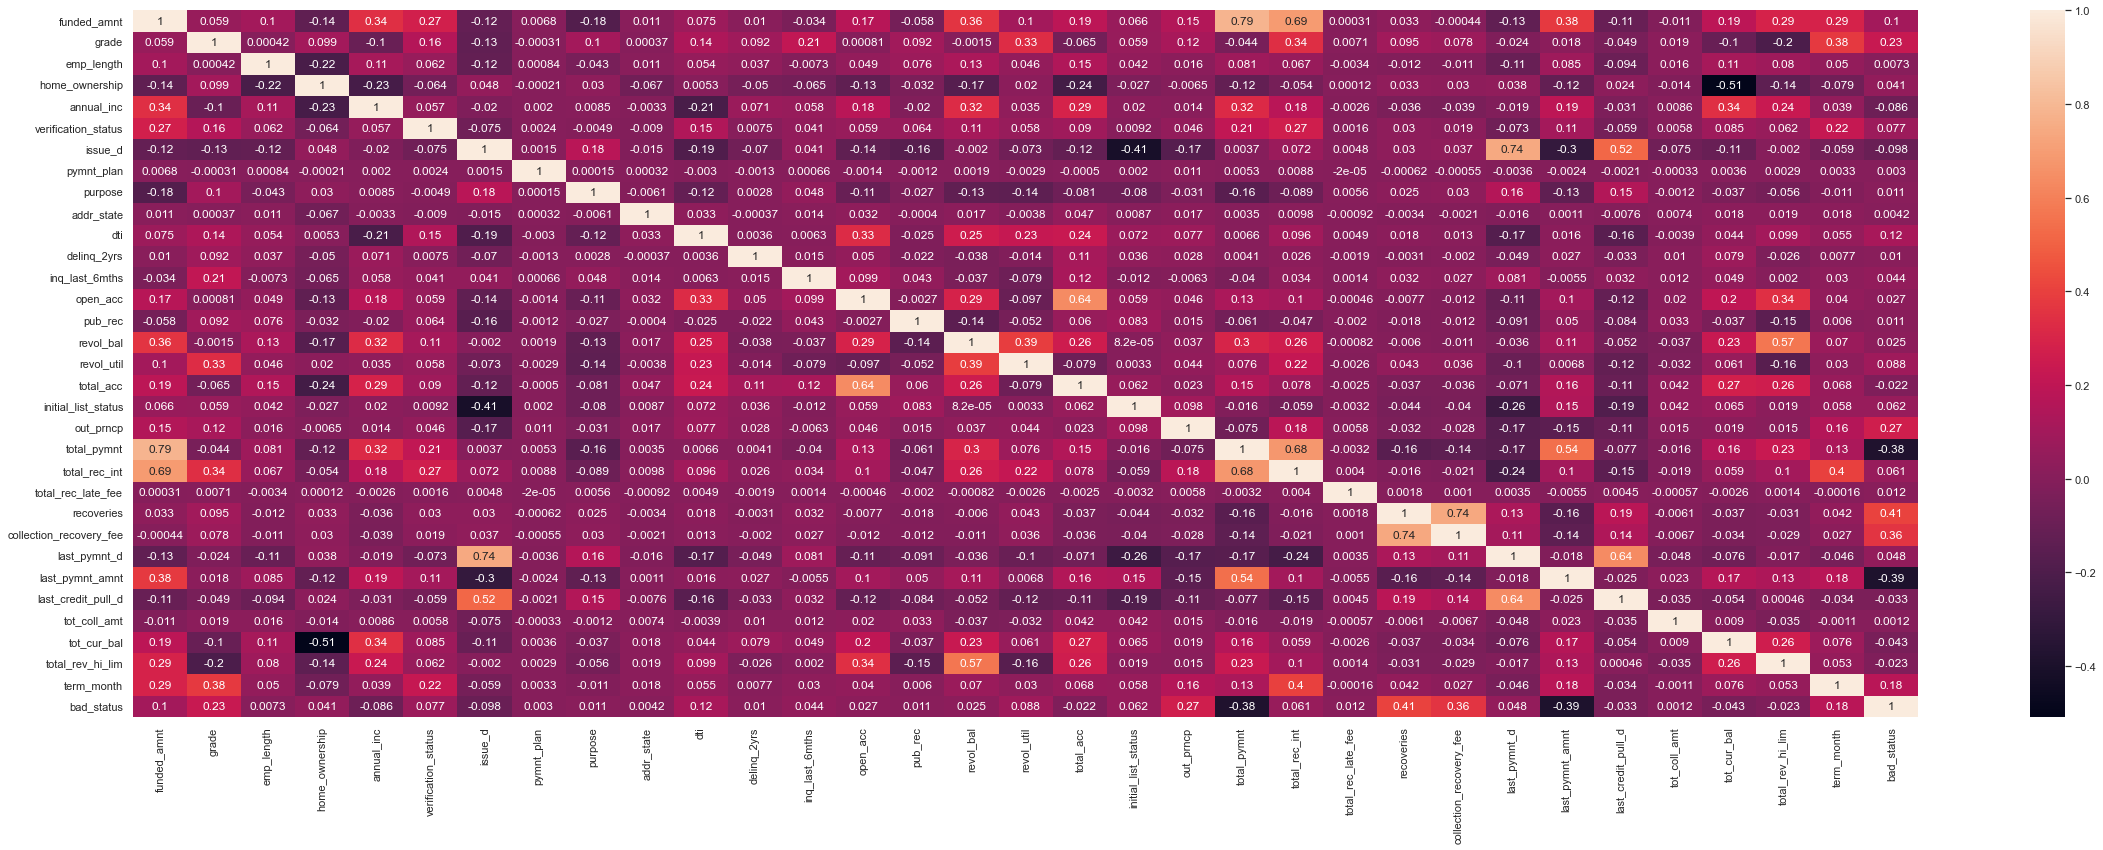

In [74]:
sns.set(rc = {'figure.figsize':(40,13)})
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:>

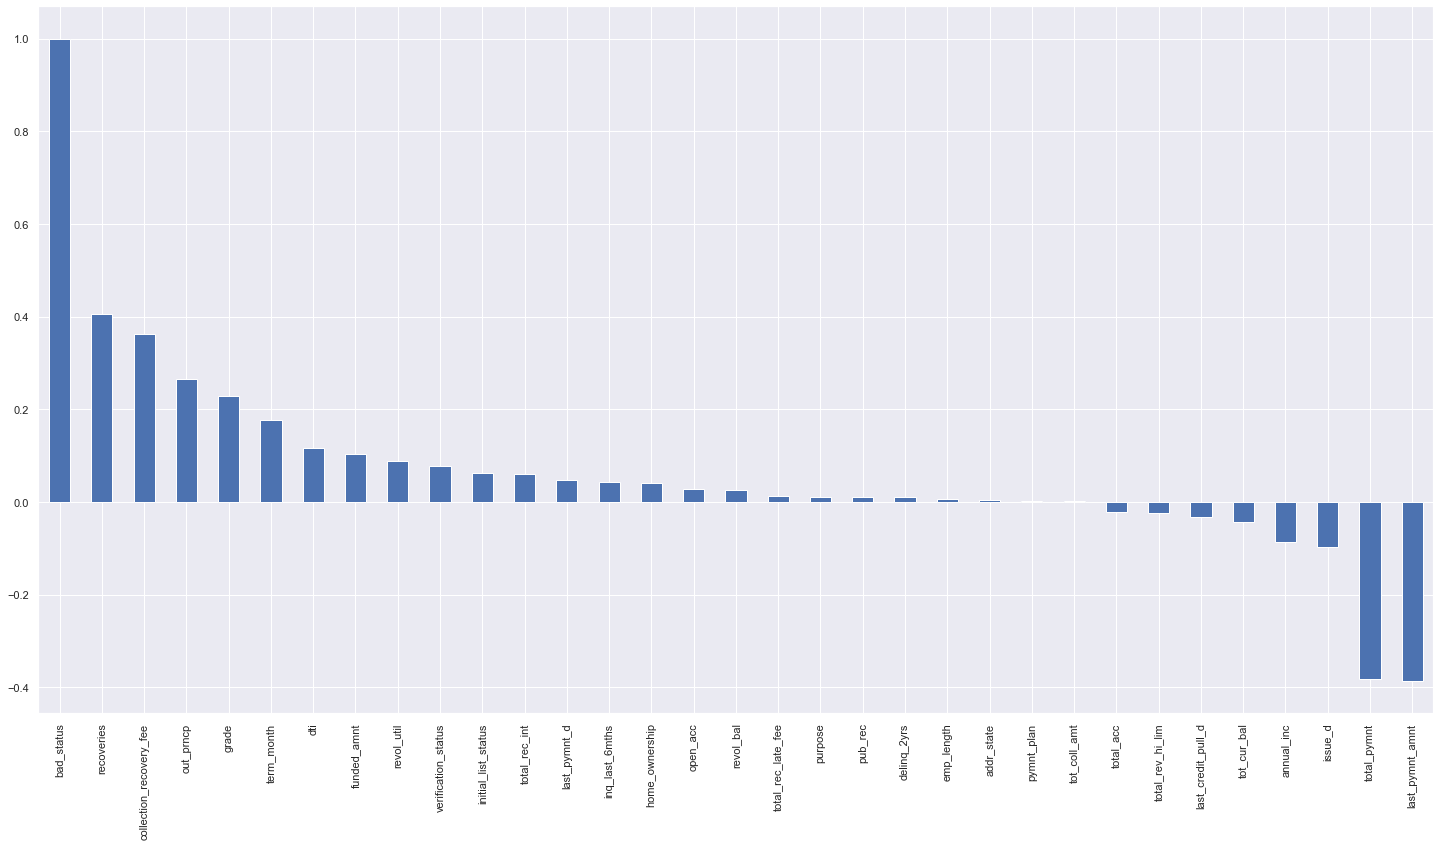

In [75]:
plt.figure(figsize=(25,13))
data.corr()['bad_status'].sort_values(ascending = False).plot(kind='bar') 

## Feature selection using RFE

In [76]:
target = data.bad_status
data_feature = data.drop('bad_status', axis=1)

In [77]:
data_feature

,funded_amnt,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_month
0,5000,1,10.00000,5,24000.0,2,72.0,0,1,3,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0,0.0,5861.071414,861.07,0.0,0.00,0.00,35.0,171.62,23.0,0.0,81539.0,22800.0,36
2,2400,2,10.00000,5,12252.0,0,72.0,0,11,14,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0,0.0,3003.653644,603.65,0.0,0.00,0.00,42.0,649.91,23.0,0.0,81539.0,22800.0,36
5,5000,0,3.00000,5,36000.0,1,72.0,0,13,3,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,0,0.0,5631.377753,631.38,0.0,0.00,0.00,35.0,161.03,27.0,0.0,81539.0,22800.0,36
7,3000,4,9.00000,5,48000.0,1,72.0,0,0,4,5.35,0.0,2.0,4.0,0.0,8221,87.5,4.0,0,0.0,3938.144334,938.14,0.0,0.00,0.00,35.0,111.34,36.0,0.0,81539.0,22800.0,36
8,5600,5,4.00000,4,40000.0,1,72.0,0,11,4,5.55,0.0,2.0,11.0,0.0,5210,32.6,13.0,0,0.0,646.020000,294.94,0.0,189.06,2.09,68.0,152.39,64.0,0.0,81539.0,22800.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466262,14000,2,5.99333,1,68000.0,2,47.0,0,2,30,25.36,1.0,0.0,19.0,0.0,14145,58.0,47.0,0,0.0,16935.850130,2935.85,0.0,0.00,0.00,28.0,8046.50,23.0,0.0,197078.0,24400.0,36
466273,6000,1,5.99333,1,25000.0,2,47.0,0,1,22,12.05,0.0,1.0,16.0,1.0,4946,19.5,48.0,0,0.0,6865.246957,865.25,0.0,0.00,0.00,26.0,2937.74,26.0,0.0,125641.0,25400.0,36
466275,6000,2,7.00000,5,27000.0,2,47.0,0,1,4,26.13,0.0,3.0,8.0,1.0,6025,57.4,16.0,0,0.0,6865.500000,865.55,0.0,0.00,0.00,33.0,126.16,23.0,0.0,259863.0,10500.0,36
466277,18000,0,3.00000,5,90000.0,2,47.0,0,2,20,10.33,1.0,0.0,16.0,0.0,8224,16.3,33.0,0,0.0,5631.670000,1050.78,0.0,0.00,0.00,37.0,563.23,38.0,0.0,42592.0,50300.0,36


In [78]:
y = target
x = data_feature

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [80]:
oversample = ADASYN()
X, Y = oversample.fit_resample(x_train, y_train)

In [81]:
Counter(Y)

Counter({0: 114891, 1: 114885})

In [82]:
model = DecisionTreeClassifier()
n_features_select = 20
rfecv = RFECV(estimator=model, scoring='accuracy')
rfecv = rfecv.fit(X,Y)

In [83]:
print('Optimum number features: %d'% rfecv.n_features_)

Optimum number features: 9


Rank features

In [84]:
features = X.columns.to_list()
for x,y in (sorted(zip(rfecv.ranking_, features), key=itemgetter(0))):
    print(x,y)

1 funded_amnt
1 issue_d
1 out_prncp
1 total_pymnt
1 total_rec_int
1 recoveries
1 last_pymnt_d
1 last_pymnt_amnt
1 last_credit_pull_d
2 term_month
3 total_rev_hi_lim
4 revol_util
5 annual_inc
6 tot_cur_bal
7 dti
8 total_acc
9 revol_bal
10 emp_length
11 open_acc
12 pub_rec
13 addr_state
14 tot_coll_amt
15 purpose
16 grade
17 inq_last_6mths
18 delinq_2yrs
19 home_ownership
20 collection_recovery_fee
21 verification_status
22 total_rec_late_fee
23 initial_list_status
24 pymnt_plan


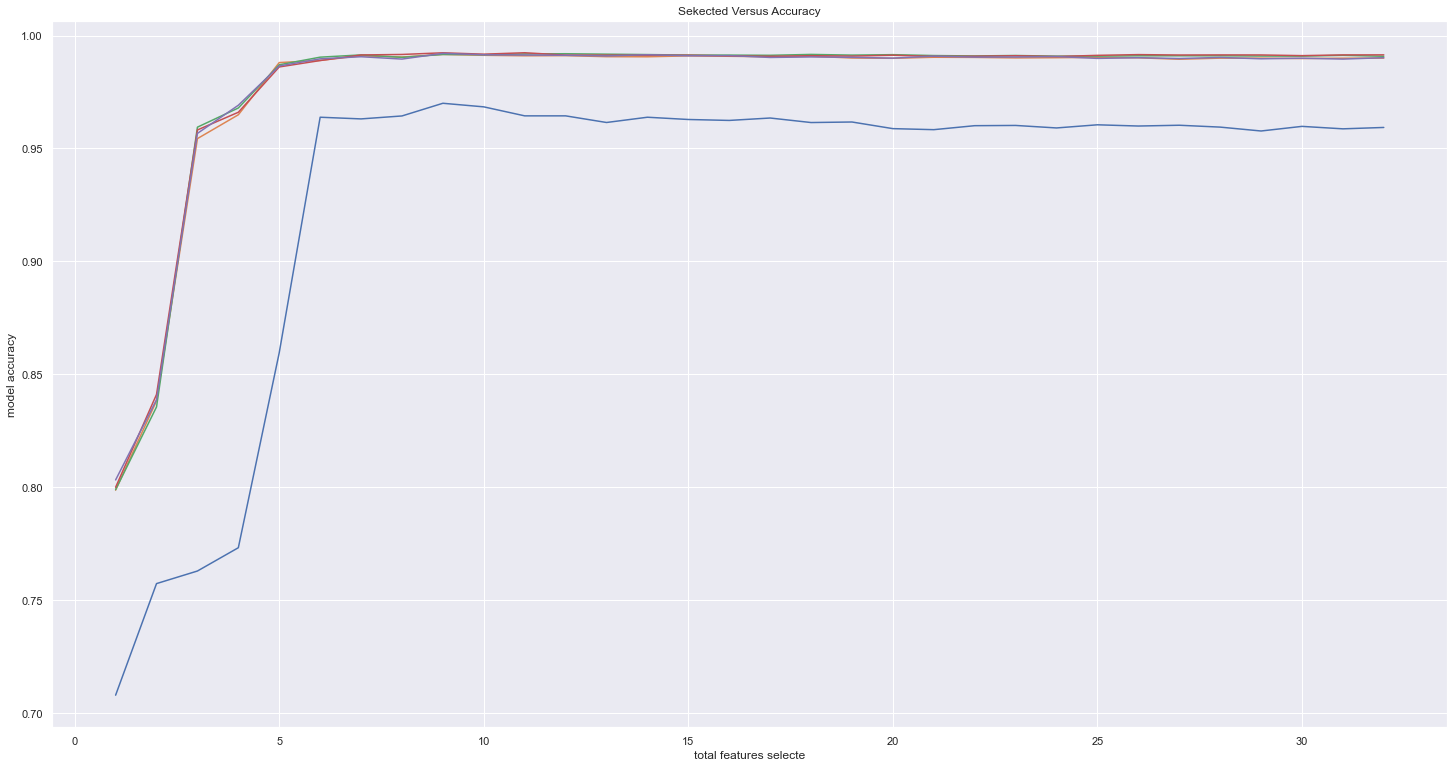

In [85]:
plt.figure(figsize=(25,13))
plt.title('Sekected Versus Accuracy')
plt.xlabel('total features selecte')
plt.ylabel('model accuracy')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [86]:
features_select = []
for i in range(X.shape[1]):
    if rfecv.support_[i] == True:
        features_select.append(features[i])

In [87]:
data_features = pd.DataFrame(columns=['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': features[i], 'support': rfecv.support_[i], 'ranking' : rfecv.ranking_[i] }
    data_features = data_features.append(row, ignore_index=True) 
    
data_features.sort_values(by='ranking')

,feature,support,ranking
0,funded_amnt,True,1
27,last_credit_pull_d,True,1
26,last_pymnt_amnt,True,1
25,last_pymnt_d,True,1
23,recoveries,True,1
21,total_rec_int,True,1
6,issue_d,True,1
20,total_pymnt,True,1
19,out_prncp,True,1
31,term_month,False,2


from feature selection using RFE get the best feature 9 variabel and ranking 1, lets see about correlation 9 variabel with bad status

In [88]:
tambah = [
    # add casue the target (label)
    'bad_status',
    # add cause high value correlation with bad_status
    'grade',
    'collection_recovery_fee'
]

In [89]:
features_select = features_select + tambah

In [90]:
features_select

['funded_amnt',
 'issue_d',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'recoveries',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'bad_status',
 'grade',
 'collection_recovery_fee']

In [91]:
loan_data_2[features_select].corr()

,funded_amnt,issue_d,out_prncp,total_pymnt,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,bad_status,collection_recovery_fee
funded_amnt,1.000000,-0.119333,0.151983,0.786305,0.692816,0.033186,-0.130295,0.377744,-0.105277,0.103824,-0.000439
issue_d,-0.119333,1.000000,-0.167423,0.003672,0.072445,0.030082,0.742462,-0.301748,0.522298,-0.098020,0.037461
out_prncp,0.151983,-0.167423,1.000000,-0.074541,0.183935,-0.031572,-0.171557,-0.145682,-0.106193,0.265302,-0.028140
total_pymnt,0.786305,0.003672,-0.074541,1.000000,0.680197,-0.157692,-0.166039,0.544222,-0.076805,-0.382164,-0.141664
total_rec_int,0.692816,0.072445,0.183935,0.680197,1.000000,-0.015735,-0.236092,0.102405,-0.148532,0.061449,-0.021055
recoveries,0.033186,0.030082,-0.031572,-0.157692,-0.015735,1.000000,0.130431,-0.157413,0.185882,0.406300,0.740308
last_pymnt_d,-0.130295,0.742462,-0.171557,-0.166039,-0.236092,0.130431,1.000000,-0.018469,0.639334,0.047554,0.106631
last_pymnt_amnt,0.377744,-0.301748,-0.145682,0.544222,0.102405,-0.157413,-0.018469,1.000000,-0.025182,-0.386437,-0.141554
last_credit_pull_d,-0.105277,0.522298,-0.106193,-0.076805,-0.148532,0.185882,0.639334,-0.025182,1.000000,-0.032615,0.143787
bad_status,0.103824,-0.098020,0.265302,-0.382164,0.061449,0.406300,0.047554,-0.386437,-0.032615,1.000000,0.362134


In [92]:
loan_data_2[features_select]

,funded_amnt,issue_d,out_prncp,total_pymnt,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,bad_status,grade,collection_recovery_fee
0,5000,72.0,0.0,5861.071414,861.07,0.00,35.0,171.62,23.0,0,B,0.00
2,2400,72.0,0.0,3003.653644,603.65,0.00,42.0,649.91,23.0,0,C,0.00
5,5000,72.0,0.0,5631.377753,631.38,0.00,35.0,161.03,27.0,0,A,0.00
7,3000,72.0,0.0,3938.144334,938.14,0.00,35.0,111.34,36.0,0,E,0.00
8,5600,72.0,0.0,646.020000,294.94,189.06,68.0,152.39,64.0,1,F,2.09
...,...,...,...,...,...,...,...,...,...,...,...,...
466262,14000,47.0,0.0,16935.850130,2935.85,0.00,28.0,8046.50,23.0,0,C,0.00
466273,6000,47.0,0.0,6865.246957,865.25,0.00,26.0,2937.74,26.0,0,B,0.00
466275,6000,47.0,0.0,6865.500000,865.55,0.00,33.0,126.16,23.0,0,C,0.00
466277,18000,47.0,0.0,5631.670000,1050.78,0.00,37.0,563.23,38.0,1,A,0.00


# Encoding categorical features

In [93]:
loan_data_3 = loan_data_2[features_select]

In [94]:
loan_data_3

,funded_amnt,issue_d,out_prncp,total_pymnt,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,bad_status,grade,collection_recovery_fee
0,5000,72.0,0.0,5861.071414,861.07,0.00,35.0,171.62,23.0,0,B,0.00
2,2400,72.0,0.0,3003.653644,603.65,0.00,42.0,649.91,23.0,0,C,0.00
5,5000,72.0,0.0,5631.377753,631.38,0.00,35.0,161.03,27.0,0,A,0.00
7,3000,72.0,0.0,3938.144334,938.14,0.00,35.0,111.34,36.0,0,E,0.00
8,5600,72.0,0.0,646.020000,294.94,189.06,68.0,152.39,64.0,1,F,2.09
...,...,...,...,...,...,...,...,...,...,...,...,...
466262,14000,47.0,0.0,16935.850130,2935.85,0.00,28.0,8046.50,23.0,0,C,0.00
466273,6000,47.0,0.0,6865.246957,865.25,0.00,26.0,2937.74,26.0,0,B,0.00
466275,6000,47.0,0.0,6865.500000,865.55,0.00,33.0,126.16,23.0,0,C,0.00
466277,18000,47.0,0.0,5631.670000,1050.78,0.00,37.0,563.23,38.0,1,A,0.00


In [95]:
loan_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172631 entries, 0 to 466278
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   funded_amnt              172631 non-null  int64  
 1   issue_d                  172631 non-null  float64
 2   out_prncp                172631 non-null  float64
 3   total_pymnt              172631 non-null  float64
 4   total_rec_int            172631 non-null  float64
 5   recoveries               172631 non-null  float64
 6   last_pymnt_d             172631 non-null  float64
 7   last_pymnt_amnt          172631 non-null  float64
 8   last_credit_pull_d       172631 non-null  float64
 9   bad_status               172631 non-null  int32  
 10  grade                    172631 non-null  object 
 11  collection_recovery_fee  172631 non-null  float64
dtypes: float64(9), int32(1), int64(1), object(1)
memory usage: 16.5+ MB


In [96]:
loan_data_3.to_csv('Data_already.csv')

One hot encoding

In [97]:
# cause data type object just one i use one hot encoding for grade
loan_data_3 = pd.get_dummies(loan_data_3, columns=['grade'])

In [98]:
loan_data_3['bad_status'].value_counts()

0    143748
1     28883
Name: bad_status, dtype: int64

split data

In [99]:
target_modeling = loan_data_3.bad_status
feature_modeling = loan_data_3.drop('bad_status', axis=1)

In [100]:
x = feature_modeling
y = target_modeling

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

oversampling using ADASYN

In [102]:
X, Y = oversample.fit_resample(x_train, y_train)

In [103]:
Counter(Y)

Counter({0: 114891, 1: 114577})

In [104]:
# Decision tree modeling
model_dt = DecisionTreeClassifier(criterion='gini')
model_dt.fit(X, Y)

prediction_test = model_dt.predict(x_test)
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28857
           1       0.96      0.96      0.96      5670

    accuracy                           0.99     34527
   macro avg       0.97      0.98      0.97     34527
weighted avg       0.99      0.99      0.99     34527



In [105]:
model_rf = RandomForestClassifier(max_depth=10)
model_rf.fit(X,Y)

prediction_test = model_rf.predict(x_test)
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     28857
           1       0.92      0.96      0.94      5670

    accuracy                           0.98     34527
   macro avg       0.96      0.97      0.96     34527
weighted avg       0.98      0.98      0.98     34527

